In [17]:
import numpy as np, pandas as pd, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv(f'C:\\Users\\Arun\\Desktop\\kaggle\\instant-gratification\\train.csv')
test = pd.read_csv('C:\\Users\\Arun\\Desktop\\kaggle\\instant-gratification\\test.csv')

train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [3]:
summary = train.describe().T
summary[summary['max']>20]

,count,mean,std,min,25%,50%,75%,max
lanky-emerald-alligator-kernel,262144.0,-0.003899,1.820951,-17.543946,-0.786385,0.002244,0.788238,20.316103
gloppy-mauve-bonobo-important,262144.0,0.012302,1.692395,-16.084418,-0.754760,0.008028,0.769533,21.075829
wheezy-copper-turtle-magic,262144.0,255.602486,147.920785,0.000000,127.000000,256.000000,384.000000,511.000000
zippy-harlequin-otter-grandmaster,262144.0,-0.003715,1.690996,-15.576517,-0.764898,-0.004821,0.759708,20.376484


In [18]:
scaler = MinMaxScaler()

In [5]:
def find_feature_columns(df):
    corr_data = df.corr()
    cor_target = abs(corr_data['target'])
    # reached 0.075 by trial and error
    relevant_features = cor_target[cor_target>=0.075]
    relevant_features.sort_values(ascending=False)
    columns = list(relevant_features.index)
    columns.append('wheezy-copper-turtle-magic')
    columns.append('id')

    test_columns = columns.copy()
    test_columns.remove('target')
    return columns, test_columns

In [6]:
splitvalues = train['wheezy-copper-turtle-magic'].unique()
len(splitvalues)

512

In [7]:
logModel = LogisticRegression(solver='liblinear',penalty='l2')

In [27]:
KNNclassifier = KNeighborsClassifier(n_neighbors=30)

In [28]:
scores=[]
for i in splitvalues:
    train_split = train[train['wheezy-copper-turtle-magic']==i]
    columns, test_columns = find_feature_columns(train_split)
    train_split = train_split[columns]
    y = train_split['target']
    X = train_split.drop('id',axis=1)
    X = X.drop('wheezy-copper-turtle-magic',axis=1)
    X = X.drop('target',axis=1)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    #logModel.fit(X_train,y_train)
    KNNclassifier.fit(X_train,y_train)
    #predictions = logModel.predict(X_valid)
    predictions = KNNclassifier.predict(X_valid)
    score = f1_score(y_valid,predictions)
    scores.append(score)

In [29]:
print('Average F1 score: ' + str(mean(scores)))

Average F1 score: 0.7509702928809389


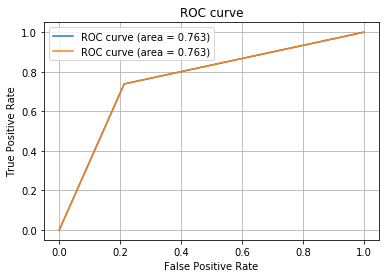

In [33]:
import matplotlib.pyplot as plt

from sklearn import metrics, preprocessing
fpr, tpr, thresholds = metrics.roc_curve(y_valid, predictions)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %.3f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()